In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from rethink.methods import GridApproximation

### Grid approximation


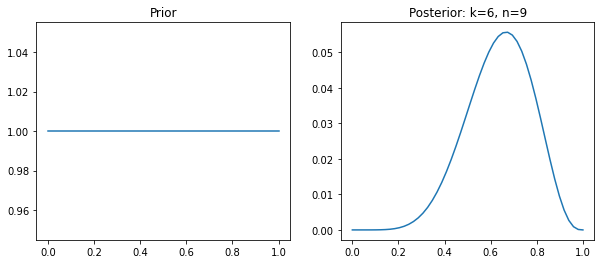

In [2]:
# tossing earth and landing on 6 water out of 9 tosses. Uniform prior. What is the water proportion?
g = 50
prior = np.repeat(1, g)

m = GridApproximation(k=6, n=9, prior=prior,g=g)
m.posterior()
m.viz()

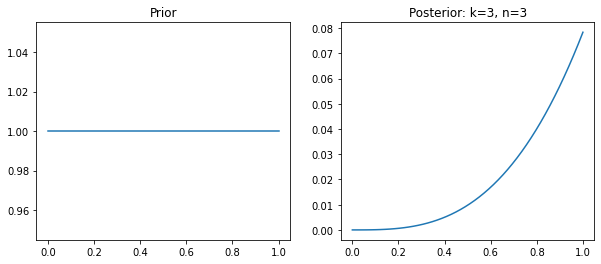

In [4]:
# tossing earth and landing on 3 water out of 3 tosses.  Uniform prior. What is the water proportion?
prior = np.repeat(1, 50)
m = GridApproximation(k=3, n=3, prior=prior,g=g)
m.posterior()
m.viz()

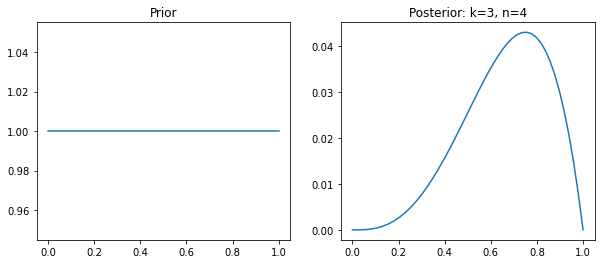

In [43]:
# tossing earth and landing on 3 water out of 4 tosses.  Uniform prior. What is the water proportion?
prior = np.repeat(1, 50)
grid_approximation(k=3, n=4, prior=prior)

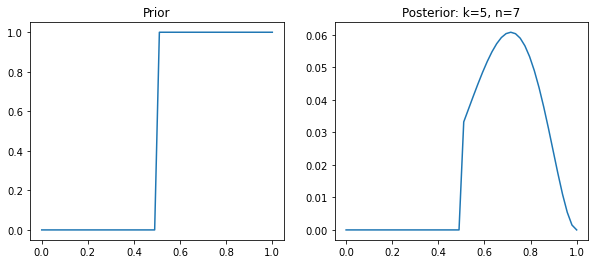

In [48]:
# tossing earth and landing on 5 water out of 7 tosses. Prior = 0 if p < 0.5. What is the water proportion?
p = np.linspace(0,1,50)
prior = [0 if x < 0.5 else 1 for x in p]

grid_approximation(k=5, n=7, prior=prior)

In [64]:
# there are two globes. Earth has 70% water, Mars has 0% water. One globe was tossed and produced land. Each globe was equaly likely to be tossed. What is the posterior prob that the globe was earth. Pr(earth|land)

# p(Earth|Land) = P(Land|Earth)*P(Earth)/ (P(Land|Earth)*P(Earth)+P(Land|Mars)*P(Mars))

# 1 for earth
k = 1
n = 1
likelihood_earth = stats.binom.pmf(k,n,p=0.3)
likelihood_mars = stats.binom.pmf(k,n,p=1.0)
prior = 0.5

(prior * likelihood_earth) / np.sum([likelihood_earth * prior, likelihood_mars * prior])

0.23076923076923075

In [75]:
# There are three cards, each with two sides. W/W, B/W, B/B. We select a card at random and show facing up. It is B. What is the probability the other side will be also B. Pr(Side2B|Side1B)

prior = 1/3

#likelihood of selecting black on card two
likelihood_W = stats.binom.pmf(1, 1, p = 1/2) 
#likelihood of selecting black on card three
likelihood_B = stats.binom.pmf(1, 1, p = 1)

(prior * likelihood_B) / np.sum([prior * likelihood_B, prior * likelihood_W])


0.6666666666666666

In [78]:
# There are four cards, each with two sides. W/W, B/W, B/B, B/B. We select a card at random and show facing up. It is B. What is the probability the other side will be also B. Pr(Side2B|Side1B)

prior = 1/4
#likelihood of selecting black on card two
likelihood_W = stats.binom.pmf(1, 1, p = 1/2) 
#likelihood of selecting black on card three
likelihood_B1 = stats.binom.pmf(1, 1, p = 1)
#likelihood of selecting black on card four
likelihood_B2 = stats.binom.pmf(1, 1, p = 1)

((prior * likelihood_B) / np.sum([prior * likelihood_B1, prior * likelihood_W, prior * likelihood_B2])) * 2


0.8